# Classification: Comparing Using and Not Using Type Information

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier

import sys
sys.path.append("../../..")

from heritageconnector.disambiguation.helpers import load_training_data, plot_performance_curves

sns.set(style='whitegrid')

## 1. Not using types

In [2]:
data_folder  = "/Volumes/Kalyan_SSD/SMG/disambiguation/v2_0709/"

X, y, pairs, pids = load_training_data(data_folder)

X.shape, y.shape, len(pids), len(pairs)

((58671, 7), (58671,), 7, 58671)

In [3]:
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, pairs.index.tolist(), test_size=0.25, random_state=42, stratify=y)

pairs_train = pairs.iloc[indices_train].copy()
pairs_test = pairs.iloc[indices_test].copy()

X_train.shape, y_train.shape, X_test.shape, y_test.shape, pairs_train.shape, pairs_test.shape

((44003, 7), (44003,), (14668, 7), (14668,), (44003, 2), (14668, 2))

average precision: 0.9549009148264053
balanced accuracy @ 0.5: 0.9705634675833925


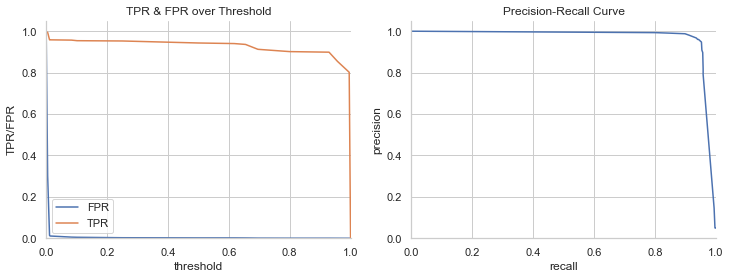

In [4]:
dtc = DecisionTreeClassifier(random_state=42, max_depth=5).fit(X_train, y_train)
y_pred_proba_dtc = dtc.predict_proba(X_test)[:,1]

print(f"average precision: {average_precision_score(y_test, y_pred_proba_dtc)}")

plot_performance_curves(y_test, y_pred_proba_dtc)

threshold_dtc = 0.5
y_pred_dtc = y_pred_proba_dtc >= threshold_dtc

print(f"balanced accuracy @ {threshold_dtc}: {balanced_accuracy_score(y_test, y_pred_dtc)}")

## 2. Using types

In [5]:
data_folder  = "/Volumes/Kalyan_SSD/SMG/disambiguation/types_people_2809/"

X, y, pairs, pids = load_training_data(data_folder)

X.shape, y.shape, len(pids), len(pairs)

((59750, 8), (59750,), 8, 59750)

In [6]:
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, pairs.index.tolist(), test_size=0.25, random_state=42, stratify=y)

pairs_train = pairs.iloc[indices_train].copy()
pairs_test = pairs.iloc[indices_test].copy()

X_train.shape, y_train.shape, X_test.shape, y_test.shape, pairs_train.shape, pairs_test.shape

((44812, 8), (44812,), (14938, 8), (14938,), (44812, 2), (14938, 2))

average precision: 0.9626019013115884
balanced accuracy @ 0.25: 0.9785733113872702


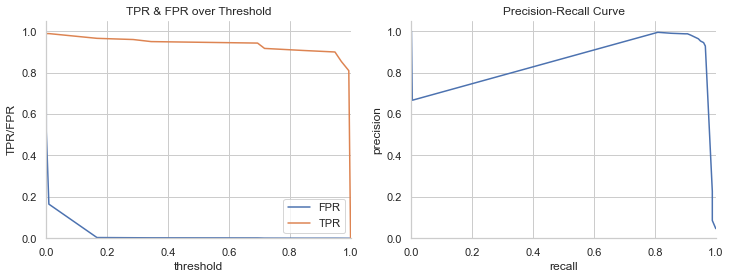

In [7]:
dtc = DecisionTreeClassifier(random_state=42, max_depth=5).fit(X_train, y_train)
y_pred_proba_dtc = dtc.predict_proba(X_test)[:,1]

print(f"average precision: {average_precision_score(y_test, y_pred_proba_dtc)}")

plot_performance_curves(y_test, y_pred_proba_dtc)

threshold_dtc = 0.25
y_pred_dtc = y_pred_proba_dtc >= threshold_dtc

print(f"balanced accuracy @ {threshold_dtc}: {balanced_accuracy_score(y_test, y_pred_dtc)}")

## 3. Organisations without Type
At this point we haven't resolved the `additionalType` field e.g charitable organisation, hospital etc. **This means that we are only using the label, founding date and dissolution date for the organisations**.

In [8]:
data_folder  = "/Volumes/Kalyan_SSD/SMG/disambiguation/types_orgs_2809/"

X, y, pairs, pids = load_training_data(data_folder)

# drop last column (of zeroes)
X = X[:, 0:3]
pids = pids[0:3]

X.shape, y.shape, len(pids), len(pairs)

((13037, 3), (13037,), 3, 13037)

In [9]:
pids

['label', 'P571', 'P576']

average precision: 0.47813313227385695
balanced accuracy @ 0.2: 0.745340616966581


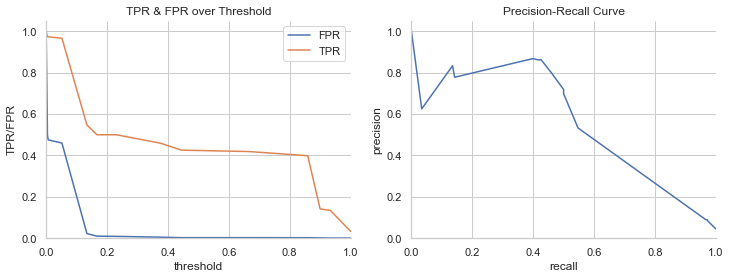

In [10]:
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, pairs.index.tolist(), test_size=0.25, random_state=42, stratify=y)

pairs_train = pairs.iloc[indices_train].copy()
pairs_test = pairs.iloc[indices_test].copy()

dtc = DecisionTreeClassifier(random_state=42, max_depth=5).fit(X_train, y_train)
y_pred_proba_dtc = dtc.predict_proba(X_test)[:,1]

print(f"average precision: {average_precision_score(y_test, y_pred_proba_dtc)}")

plot_performance_curves(y_test, y_pred_proba_dtc)

threshold_dtc = 0.2
y_pred_dtc = y_pred_proba_dtc >= threshold_dtc

print(f"balanced accuracy @ {threshold_dtc}: {balanced_accuracy_score(y_test, y_pred_dtc)}")